<font size="6">Analyzing Stocks Using R</font>

A general and technical analysis of Amazon (AMZN)’s stock and a price simulation using random walk and monte carlo method. Visualizations done with plotly and ggplot.

By Joy Gracia Harjanto

Aug 24, 2018 at Medium

Amazon (AMZN)’s stock experienced a 95.6% (+$918.93) increase this past year, which makes Amazon (AMZN) a desirable choice for many investors. Many analysts also believe Amazon (AMZN)’s value will continue to increase in the upcoming years. While it sounds tempting to purchase the stock, an elaborate in-depth analysis should be done to avoid purchasing the stock based on speculation.

I implemented my knowledge in Statistics and R skills to analyze its performance from a technical side and predict its future price. I heavily relied on a packages frequently used in quantitative finance such as `quantmod` and `xts` to fulfill my goal.

Here is the complete list of packages I used:

In [4]:
#  Turn off warning messages
options(warn=-1)

See [stackoverflow](https://stackoverflow.com/questions/67358683/turn-off-warnings-in-r-notebook) for more information on turning off warning messages.

In [5]:
library(quantmod)
library(xts)
library(rvest)
library(tidyverse)
library(stringr)
library(forcats)
library(lubridate)
library(plotly)
library(dplyr)
library(PerformanceAnalytics)

In [6]:
# Turn warnings back on
options(warn=0)

I started my analysis by obtaining the log returns of Amazon’s stock beginning August 1st, 2008 to August 17th, 2018:

In [7]:
getSymbols("AMZN", from="2008-08-01", to="2018-08-17")
AMZN_log_returns <- AMZN %>% Ad() %>% dailyReturn(type='log')

[1] "AMZN"

The log returns doesn’t make sense at this stage but it is actually the fundamental of my
analysis. I will explain later.

# Technical Analysis

I started by doing a technical analysis of Amazon’s stock:

The first chart series graph is straightforward as it shows Amazon’s price chart:

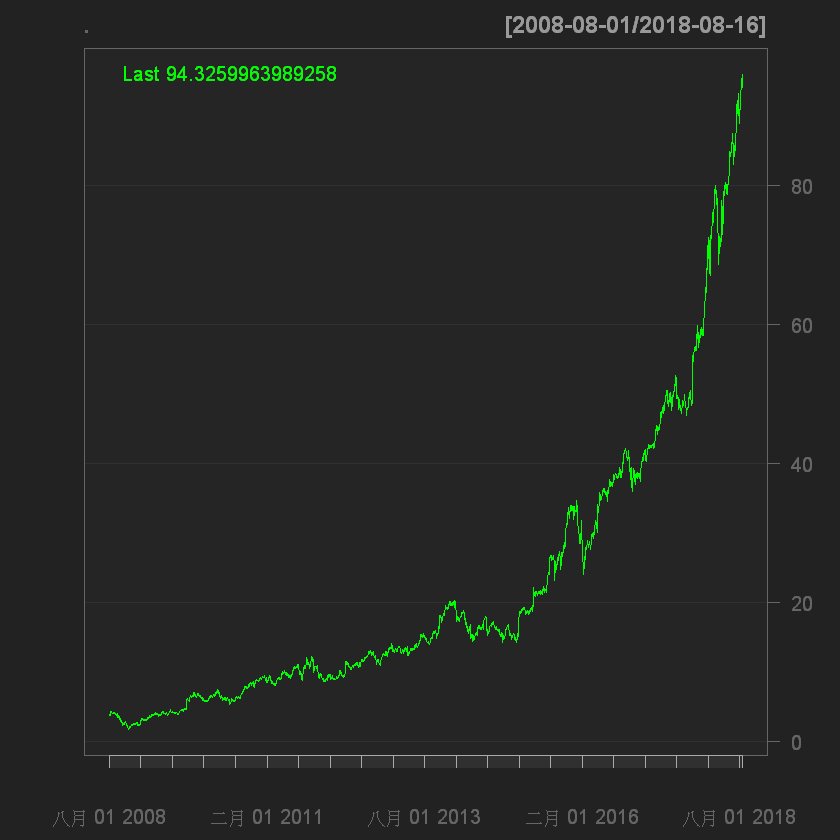

In [12]:
AMZN %>% Ad() %>% chartSeries()

The second chart series show the Bollinger Band chart, % Bollinger change, Volume Traded and Moving Average Convergence Diverence in 2018 alone:

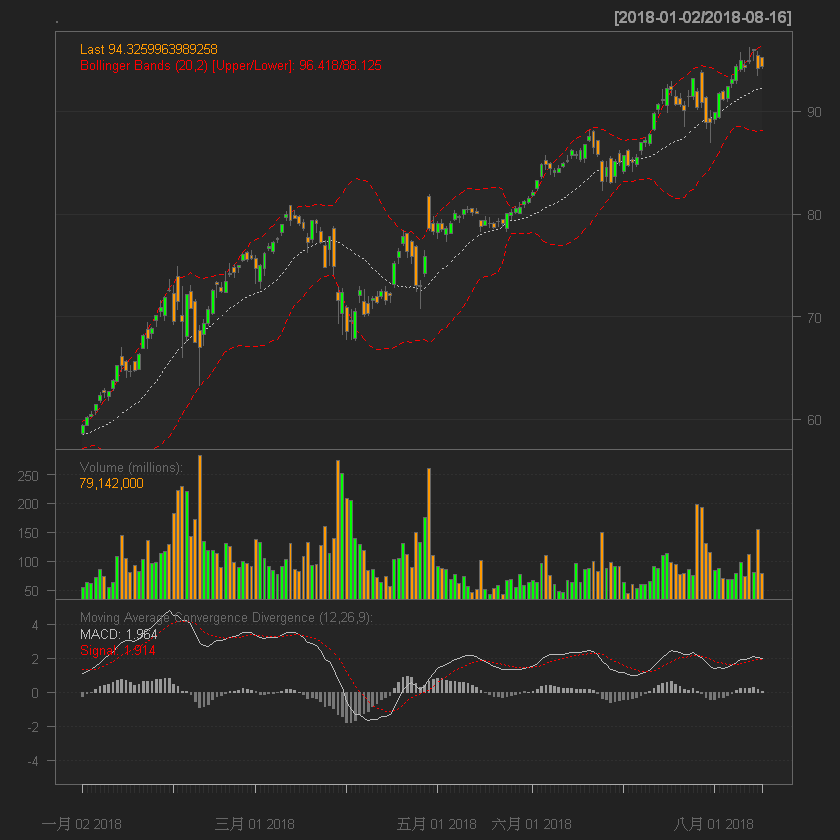

In [13]:
AMZN %>% chartSeries(TA='addBBands();addVo();addMACD()',subset='2018')

The moving average is important to understanding Amazon (AMZN)’s technical charts. It smoothes out daily price fluctuations by averaging stock prices and is effective in identifying potential trends.

The Bollinger Band chart plots two standard deviations away from the moving average and is used to measure the stock’s volatiliy. The Volume chart shows how its stocks are traded on the daily. The Moving Average Convergence Divergence gives technical analysts buy/sell signals. The rule of thumb is: If it falls below the line, it is time to sell. If it rises above the line, it is experiencing an upward momentum.

The charts above are usually used to decide whether to buy/sell a stock. Since I am not a certified financial analyst, I decided to do additional research to convince myself.

In [16]:
getSymbols("GOOGL", from="2008-08-01", to="2018-08-17")
getSymbols("AAPL", from="2008-08-01", to="2018-08-17")
getSymbols("META", from="2008-08-01", to="2018-08-17")

[1] "GOOGL"

[1] "AAPL"

[1] "META"

In [18]:
#  Turn off warning messages
options(warn=-1)

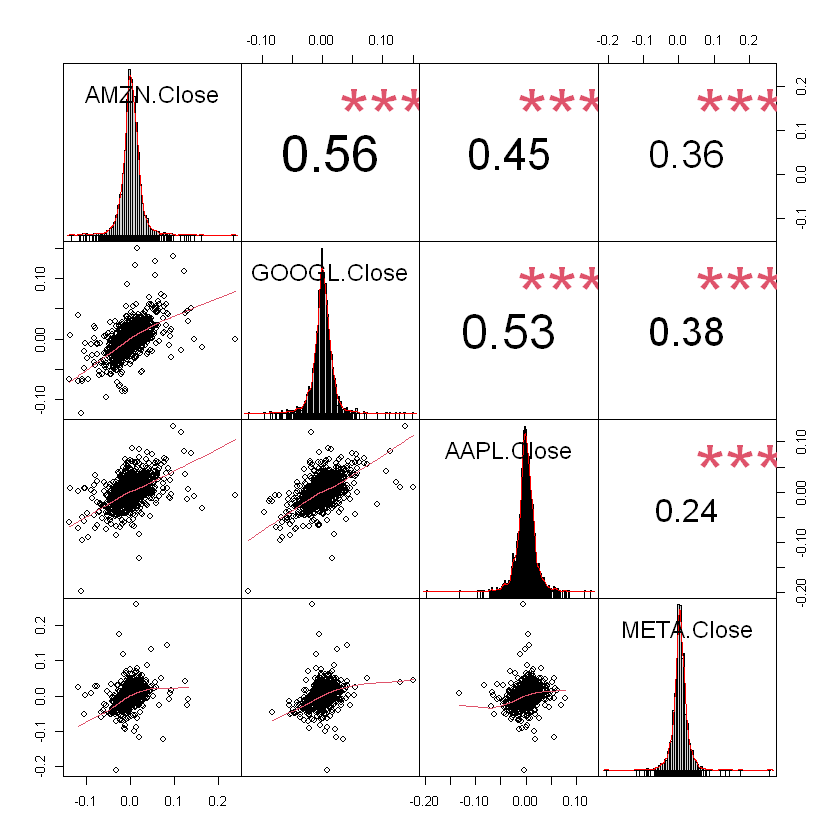

In [19]:
# Using the library 'PerformanceAnalytics'
data <- cbind(diff(log(Cl(AMZN))),diff(log(Cl(GOOGL))),diff(log(Cl(AAPL))),diff(log(Cl(META))))
chart.Correlation(data)